Link Tableu : https://public.tableau.com/app/profile/harari.netanya/viz/Milestone1_16922605191780/Story1?publish=yes

Link dataset : https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

# Problem Identification 

SMART METHOD

- Specific: analysis of any condition of a lender to obtain the approval of the loan from the bank 
- Measureable: The analysis is successful if one factor is found that affects the bank's approval. 
- Achievable: The analysis may be carried out because the data from the previous lender is available in full. 
- Relevant: This analysis is required by the bank to issue approval accurately. 
- Time Bound: Analysis is done within 3 days.

Problem Statement: "Analysis of factors that influence the approval of borrowing from the bank"

Question:
 
- How many presentations does a lender have to get approval?
- How's the financial condition of a borrower who's approved and not approved the loan?
- Is there a correlation between customer earnings and customer scores?
- Is there an influence of the type of job on the approval of the loan?
- Is there any influence on the scores to get approval?
- Is there any influence from education to the approval of borrowing?
- What's the relationship between 'loan_amount' and 'loans_term'? Is the amount of the loan correlated with the duration of the credit?
- Is there a correlation between 'no_of_dependents' and 'loan_amount'? Does the amount of family dependence affect the loan amount approved?
 
- How's the correlation between the assets owned and the amount borrowed?
 
- How's the correlation between the scores and the assets the borrower owns?
 
 

# DATA LOADING

In [2]:
import pandas as pd

In [3]:
df =pd.read_csv('loan_approval_dataset.csv')
df

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

# DATA CLEANING

In [4]:
df.duplicated().sum()

#Checking duplicated data

0

In [5]:
df.columns = df.columns.str.strip()

df.columns

#Delete white spaces on columns name

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [6]:
column = ['education', 'self_employed', 'loan_status']

for i in column :
    df[i] = df[i].str.strip()

for i in column :
    cek = df[i].unique()
    print (cek)

#Delete white spaces on columns data

['Graduate' 'Not Graduate']
['No' 'Yes']
['Approved' 'Rejected']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


From the .info() function, it appears that the data set used is clean. This is marked by the absence of missing values in any column. And also, the type of each data point is already in line with what it should be.

In [8]:
df.to_csv('data_fix.csv')

#convert data cleaned to csv

 # ANALYSIS

In [9]:
''' Import several libraries for statistical calculation and data visualization'''
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
# Skewness checking or normal checking on this data set
column = ['income_annum',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value','cibil_score']


for i in column :
    skewness = df[i].skew()
    print('skewness of ', i , ' :',skewness)

skewness of  income_annum  : -0.012814425096650109
skewness of  residential_assets_value  : 0.9784505965115631
skewness of  commercial_assets_value  : 0.9577908874986114
skewness of  luxury_assets_value  : 0.3222075028955774
skewness of  bank_asset_value  : 0.5607250089736816
skewness of  cibil_score  : -0.009039277330065707


From the distribution of such data, it can be seen that the skewness of the cibil data, income_annum, and luxury_asset_value have been normally allocated because they have skewnesses in the range -0.5 to 0.5.

### Overview Data spread based on loan status

/Users/harari/miniconda3/envs/hck7/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


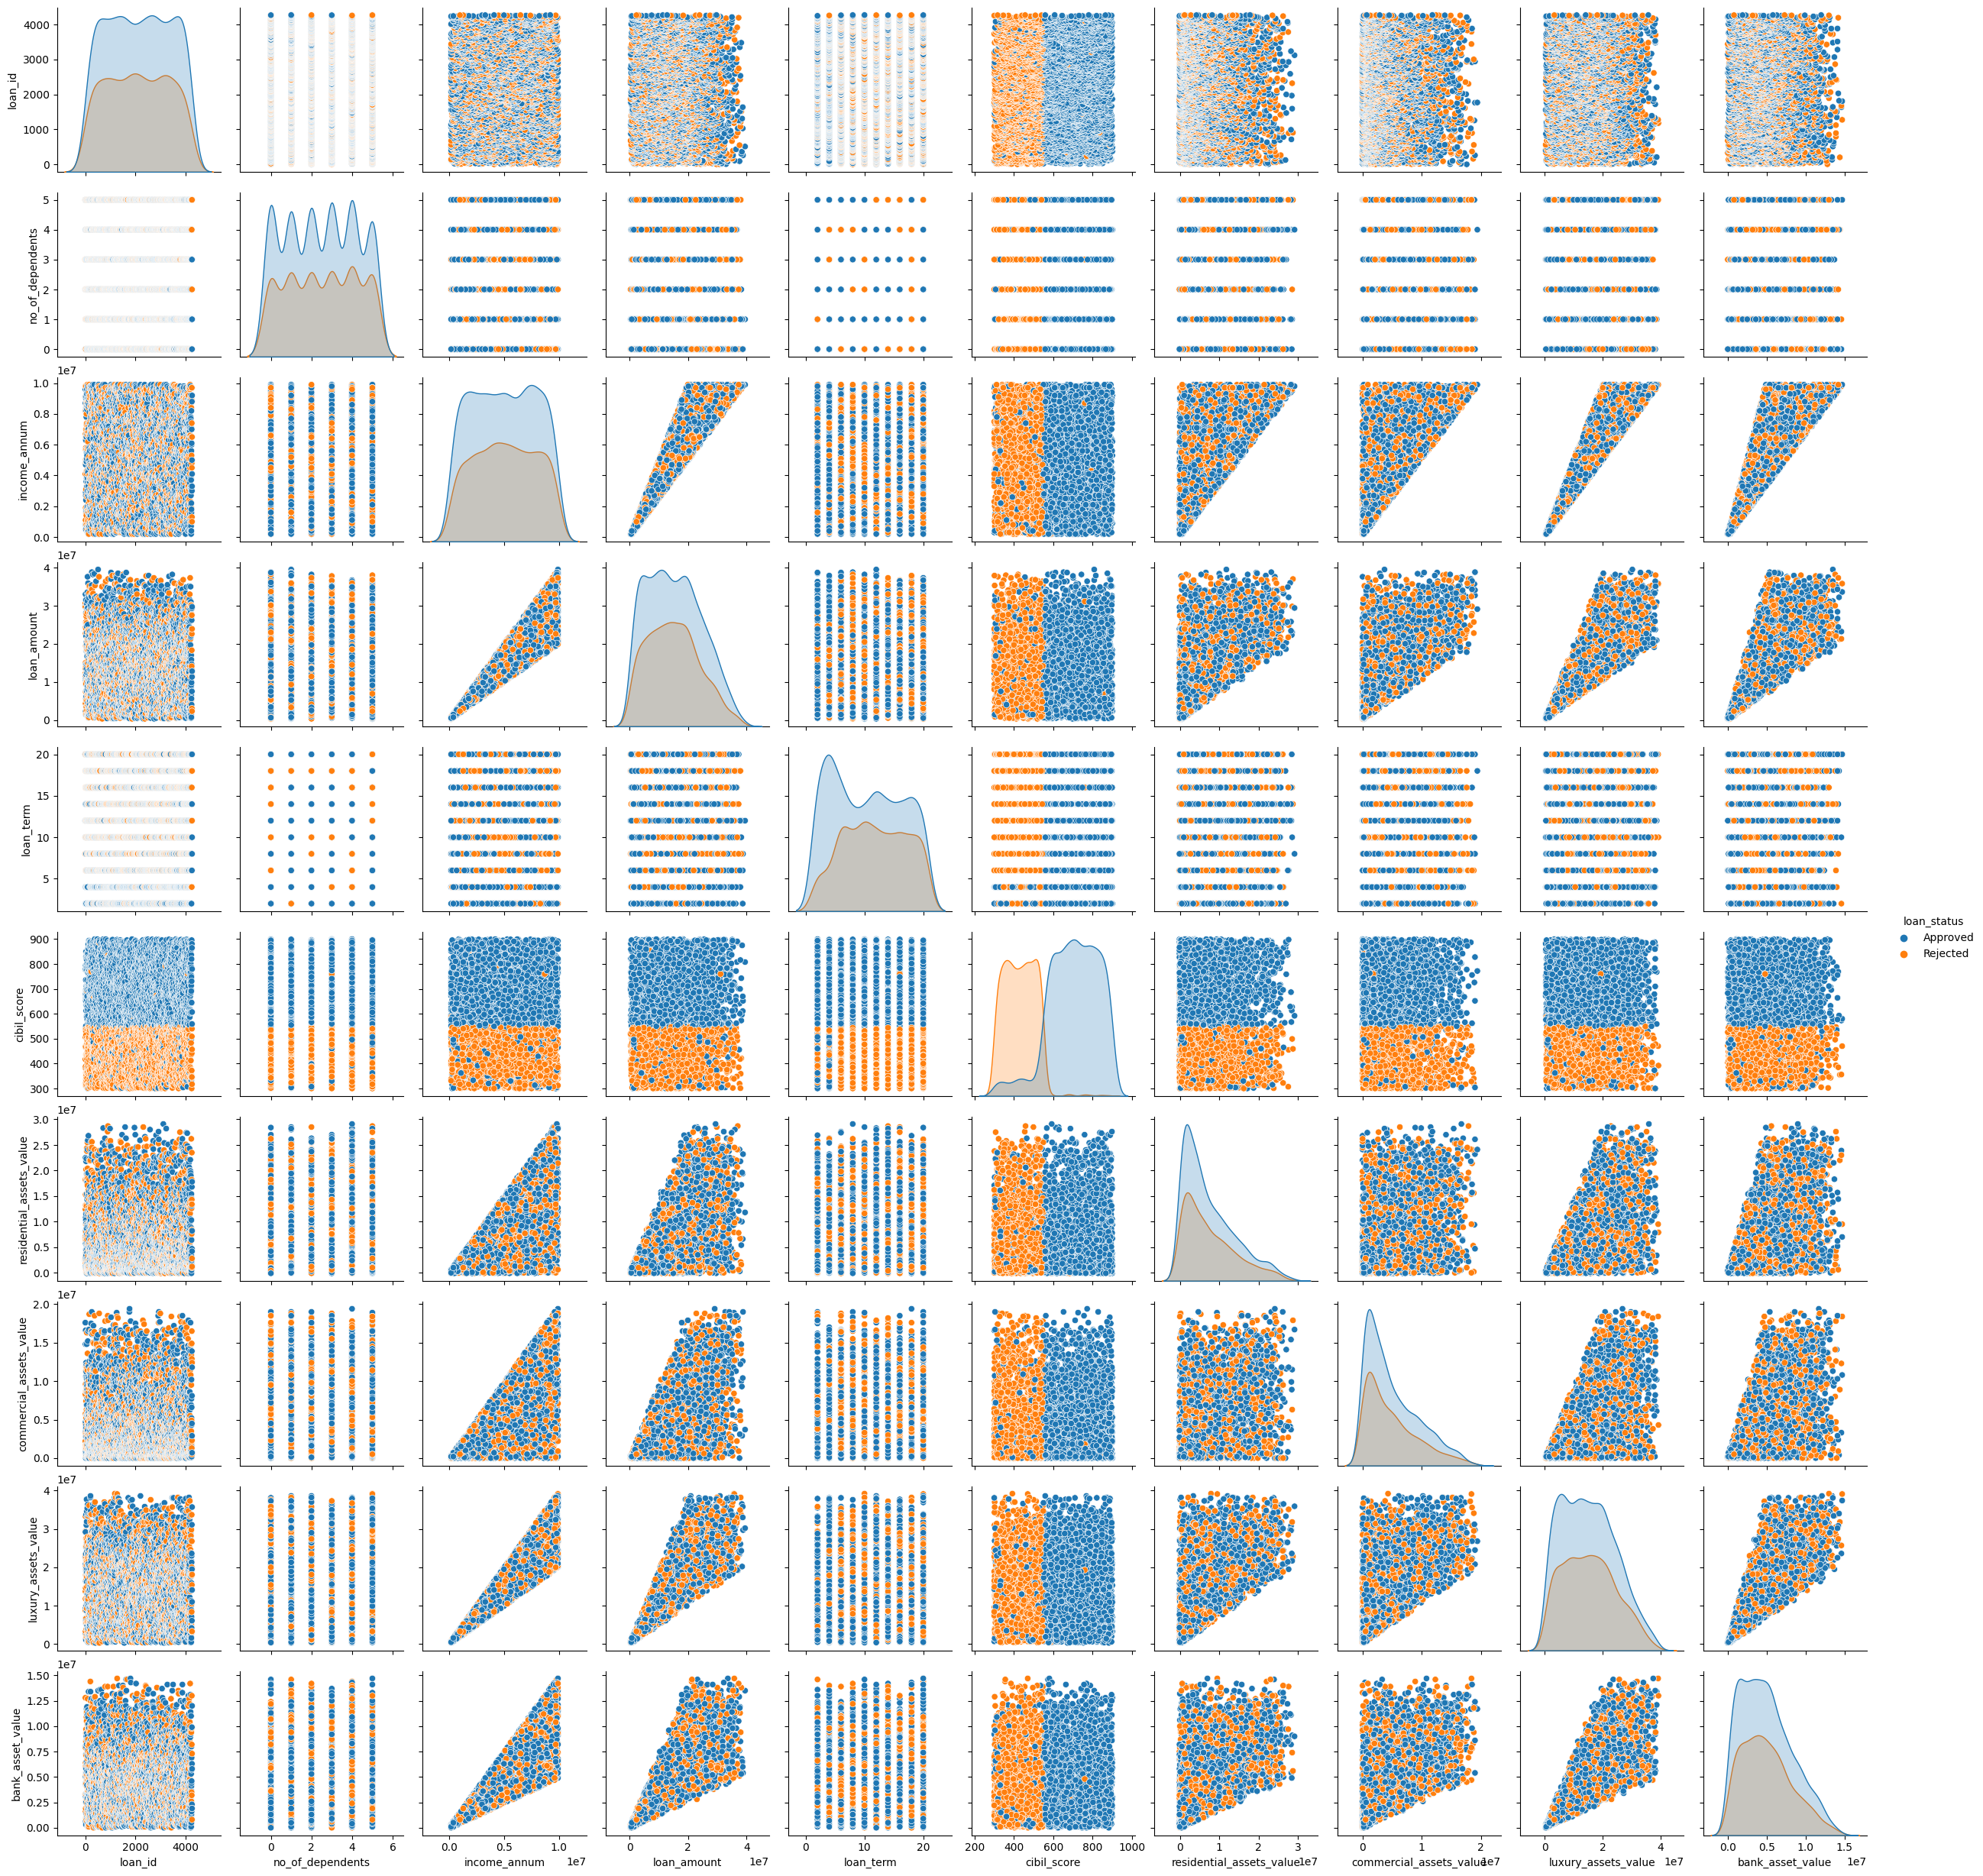

In [11]:
# Check how the spread of each data in the dataset based its approval

sns.pairplot(data=df, hue='loan_status')
plt.show()

This graph shows that one aspect that can divide the two groups (approval and rejected) is the score. Therefore, below will be some analysis that will test the correlation of some aspects with other aspects.

### How many presentations does a lender have to get approval?

In [44]:
presentase = len(df[(df['loan_status']=='Approved')])/len (df['loan_id'])*100

print('The presentation of the borrower that is proven is ', presentase, ' %')

The presentation of the borrower that is proven is  62.215975638322796  %


In [13]:
''' Visualisasi data dengan bentuk pie chart'''
fig,ax1 = plt.subplots(figsize=(8,8))

df['loan_status'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()


From this calculation can be determined the probability of a borrower to obtain approval from the bank is 62.22%.

### How's the financial condition of a borrower who's approved and not approved the loan?

##### Approved

In [45]:
approved = df[(df['loan_status'] == 'Approved')]
approved = pd.DataFrame(approved)
approved


loan_id  no_of_dependents     education self_employed  income_annum  \
0           1                 2      Graduate            No       9600000   
6           7                 5      Graduate            No       8700000   
8           9                 0      Graduate           Yes        800000   
10         11                 4      Graduate           Yes       2900000   
13         14                 2      Graduate           Yes       9100000   
...       ...               ...           ...           ...           ...   
4261     4262                 3      Graduate           Yes       3000000   
4263     4264                 3      Graduate            No       5000000   
4265     4266                 0  Not Graduate           Yes       3300000   
4267     4268                 1  Not Graduate            No       4100000   
4268     4269                 1      Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
6        33000000          4          678                  22500000   
8         2200000         20          782                   1300000   
10       11200000          2          547                   8100000   
13       31500000         14          679                  10800000   
...           ...        ...          ...                       ...   
4261      7500000          6          881                   1400000   
4263     12700000         14          865                   4700000   
4265     11300000         20          559                   4200000   
4267     12800000          8          780                   8200000   
4268     29700000         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    17600000             22700000           8000000   
6                    14800000             29200000           4300000   
8                      800000              2800000            600000   
10                    4700000              9500000           3100000   
13                   16600000             20900000           5000000   
...                       ...                  ...               ...   
4261                  4500000              6100000           2300000   
4263                  8100000             19500000           6300000   
4265                  2900000             11000000           1900000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

     loan_status  
0       Approved  
6       Approved  
8       Approved  
10      Approved  
13      Approved  
...          ...  
4261    Approved  
4263    Approved  
4265    Approved  
4267    Approved  
4268    Approved  

[2656 rows x 13 columns]

In [46]:
# Mean
''' Mean calculation done looping for customer finances'''
a = ['income_annum', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']

for i in a:
    x = approved[i].mean()  
    print('Mean of ', i ,'is ', x)

Mean of  income_annum is  5025903.614457832
Mean of  residential_assets_value is  7399811.746987952
Mean of  commercial_assets_value is  5001355.421686747
Mean of  luxury_assets_value is  15016603.91566265
Mean of  bank_asset_value is  4959525.602409638


In [47]:
#Median
''' Median calculation done looping for customer finances'''
a = ['income_annum', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']

for i in a:
    x = approved[i].median()  
    print('Median of ', i ,'is ', x)

Median of  income_annum is  5000000.0
Median of  residential_assets_value is  5400000.0
Median of  commercial_assets_value is  3700000.0
Median of  luxury_assets_value is  14400000.0
Median of  bank_asset_value is  4500000.0


In [48]:
#Modus
''' Mode calculation done looping for customer finances'''
a = ['income_annum', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']

for i in a:
    x = approved[i].mode()  
    print('Mode of ', i ,'is ', x)

Mode of  income_annum is  0    7000000
Name: income_annum, dtype: int64
Mode of  residential_assets_value is  0    400000
Name: residential_assets_value, dtype: int64
Mode of  commercial_assets_value is  0    0
Name: commercial_assets_value, dtype: int64
Mode of  luxury_assets_value is  0    6200000
Name: luxury_assets_value, dtype: int64
Mode of  bank_asset_value is  0    1600000
Name: bank_asset_value, dtype: int64


#### Rejected


In [49]:

non_approved = df[(df['loan_status'] != 'Approved')]
non_approved = pd.DataFrame(non_approved)
non_approved 

loan_id  no_of_dependents     education self_employed  income_annum  \
1           2                 0  Not Graduate           Yes       4100000   
2           3                 3      Graduate            No       9100000   
3           4                 3      Graduate            No       8200000   
4           5                 5  Not Graduate           Yes       9800000   
5           6                 0      Graduate           Yes       4800000   
...       ...               ...           ...           ...           ...   
4258     4259                 5      Graduate           Yes       9700000   
4259     4260                 0  Not Graduate           Yes       4500000   
4262     4263                 5      Graduate            No       1300000   
4264     4265                 5      Graduate           Yes       1000000   
4266     4267                 2  Not Graduate            No       6500000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
1        12200000          8          417                   2700000   
2        29700000         20          506                   7100000   
3        30700000          8          467                  18200000   
4        24200000         20          382                  12400000   
5        13500000         10          319                   6800000   
...           ...        ...          ...                       ...   
4258     22600000         16          346                  23500000   
4259     11500000         14          509                  13400000   
4262      3000000         20          540                   1000000   
4264      2300000         12          317                   2800000   
4266     23900000         18          457                   1200000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
1                     2200000              8800000           3300000   
2                     4500000             33300000          12800000   
3                     3300000             23300000           7900000   
4                     8200000             29400000           5000000   
5                     8300000             13700000           5100000   
...                       ...                  ...               ...   
4258                 12900000             26800000          13000000   
4259                  2300000             15400000           5900000   
4262                  2300000              3200000           1900000   
4264                   500000              3300000            800000   
4266                 12400000             18100000           7300000   

     loan_status  
1       Rejected  
2       Rejected  
3       Rejected  
4       Rejected  
5       Rejected  
...          ...  
4258    Rejected  
4259    Rejected  
4262    Rejected  
4264    Rejected  
4266    Rejected  

[1613 rows x 13 columns]

In [50]:
#Mean
'''  Mean calculation done looping for customer finances'''
a = ['income_annum',  'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']

for i in a:
    x = non_approved[i].mean()  
    print('Mean of ', i ,'is ', x)

Mean of  income_annum is  5113825.17048977
Mean of  residential_assets_value is  7592498.450092995
Mean of  commercial_assets_value is  4926720.396776194
Mean of  luxury_assets_value is  15306943.583384996
Mean of  bank_asset_value is  5004959.702417855


In [52]:
#Median
''' Median calculation done looping for customer finances'''
a = ['income_annum',  'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']

for i in a:
    x = non_approved[i].median()  
    print('Median of ', i ,'is ', x)

Median of  income_annum is  5100000.0
Median of  residential_assets_value is  5900000.0
Median of  commercial_assets_value is  3700000.0
Median of  luxury_assets_value is  14800000.0
Median of  bank_asset_value is  4600000.0


In [53]:
#Modus 
''' Mode calculation done looping for customer finances'''
a = ['income_annum',  'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']

for i in a:
    x = non_approved[i].mode()  
    print('Modus dari ', i ,'adalah sebesar ', x)

Modus dari  income_annum adalah sebesar  0    4100000
Name: income_annum, dtype: int64
Modus dari  residential_assets_value adalah sebesar  0    100000
Name: residential_assets_value, dtype: int64
Modus dari  commercial_assets_value adalah sebesar  0    0
Name: commercial_assets_value, dtype: int64
Modus dari  luxury_assets_value adalah sebesar  0    2900000
Name: luxury_assets_value, dtype: int64
Modus dari  bank_asset_value adalah sebesar  0    1400000
Name: bank_asset_value, dtype: int64


The financial condition of approved and rejected clients is more or less equal. This shows that the financial situation is not necessarily a matter of consideration for approval.

#### Graph

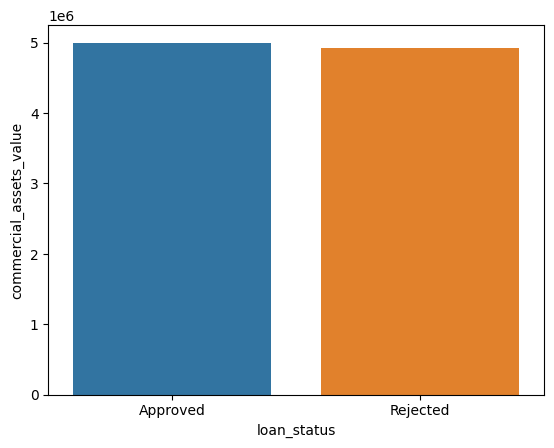

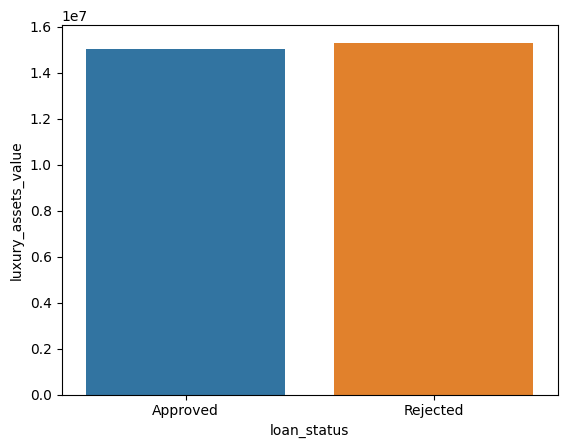

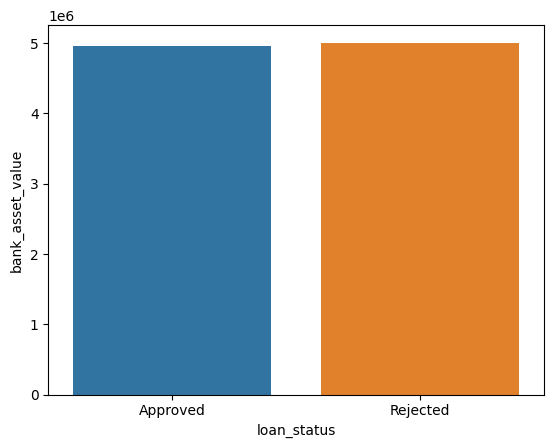

In [22]:
''' Average customer financial visualization '''
nama_kolom = ['income_annum',  'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']

for i in nama_kolom:
    grafik = df.groupby(['loan_status'])[i].mean().reset_index()

    sns.barplot(data=grafik, x='loan_status', y=i, orient='v')
    
    plt.show()

The financial condition of approved and rejected clients is more or less equal. This shows that the financial condition is not necessarily a matter of consideration for an approval. 

### Is there a correlation between customer earnings and customer scores?


In [23]:
''' Correlation checking'''
corr_r, pval_s = stats.pearsonr(df['income_annum'], df['cibil_score'])

print(f"rho-correlation: {corr_r:.2f}")
print(f"p-value: {pval_s}")

rho-correlation: -0.02
p-value: 0.13238260703738366


/Users/harari/miniconda3/envs/hck7/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


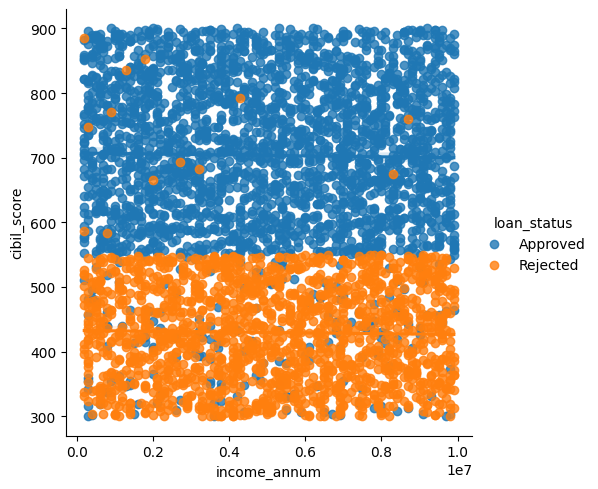

In [24]:
''' Visualization'''
sns.lmplot(data=df,x='income_annum', y='cibil_score',hue ='loan_status')

H0 : There is no relationship between job type and approval 

H1: There is a relationship between the type of job with approval



If the r-corr value = -0.02 shows a very weak negative correlation and the pvalue shows a value >0.05, then H0 fails to be rejected. Once visualized, the data is highly random and there is no apparent connection between the two. 

### Is there an influence of the type of job on the approval of the loan?

H0 : No relationship between job type and approval

H1 : There is a relationship between job type and approval

In [54]:
''' Correlation Checking'''
employ_loan = pd.crosstab(df['self_employed'], df['loan_status'])
employ_loan

loan_status    Approved  Rejected
self_employed                    
No                 1318       801
Yes                1338       812

In [26]:
res = stats.chi2_contingency(employ_loan)
print("P-value:",res.pvalue)

P-value: 1.0


With chi square testing yielding a p-value greater than 0.05, H0 failed to reject. Therefore, there is no relationship between approval (loan status) and self-employment.

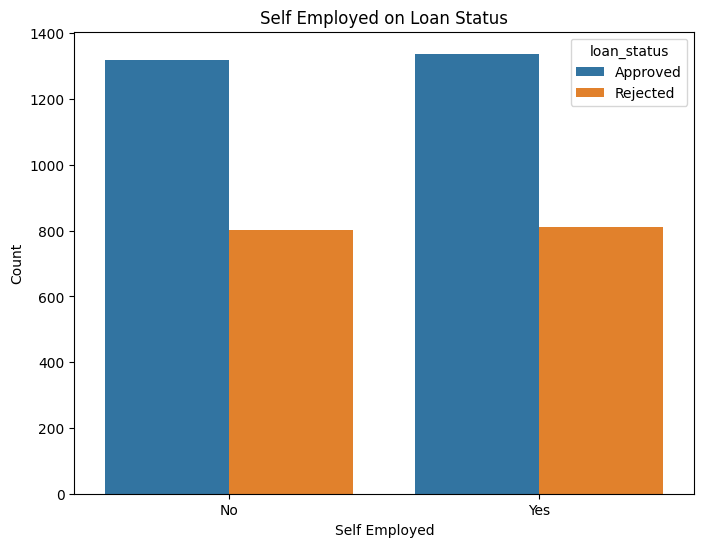

In [55]:
''' Visualisasi komparasi self_emploted terhadap loan_status'''
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='self_employed', hue='loan_status')
plt.title('Self Employed on Loan Status')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.show()

### Is there any influence on the cibil scores to get approval?


In [28]:
''' Mean of cibil score for approved customer'''
approved['cibil_score'].mean()

703.4619728915662

In [29]:
''' Mean of cibil score for non approved customer'''
non_approved['cibil_score'].mean()

429.4680719156851

There's a difference of approximately 270, so we're going to test it to see if it's significant or not.

H0 : approved cibil_score is not related to rejected


H1 : cibil_score approved is related to cibil _score rejected

In [30]:
''' Pengujian dilakukan secara T test'''
t_stat, p_val = stats.ttest_ind(approved['cibil_score'],non_approved['cibil_score'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: 78.96236186015597
P-value: 0.0


Because the p-value is <0.05, H0 is rejected, therefore the Cibil score value of the approved and group
non approved is very different. And therefore cibil_score is one of the influencing factors
loan approval from the bank.

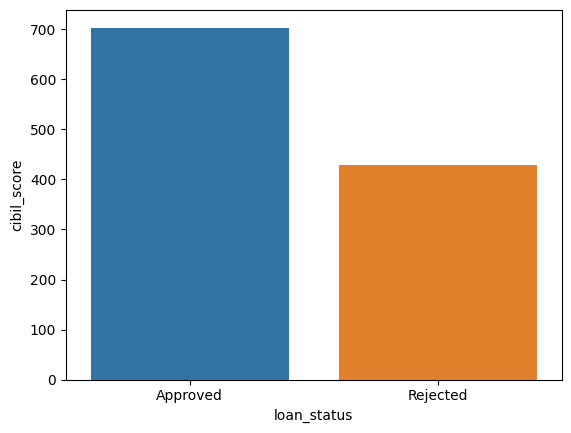

In [31]:
''' Data visualization'''
grafik_cibil = df.groupby(['loan_status'])['cibil_score'].mean().reset_index()
sns.barplot(data=grafik_cibil, x='loan_status', y='cibil_score', orient='v')
plt.show()


###  Is there any influence from education to the approval ?

H0: There is no relationship between education level and approval

H1: There is a relationship between education level and approval

In [32]:
''' Pengujian dilakukan secara chi-squared karena melibatkan dua data kategorikal'''
edu_loan = pd.crosstab(df['education'], df['loan_status'])
edu_loan

loan_status   Approved  Rejected
education                       
Graduate          1339       805
Not Graduate      1317       808

In [33]:
cek_edu_loan = stats.chi2_contingency(edu_loan)
print("P-value:",cek_edu_loan.pvalue)

P-value: 0.7720042291016309


With the chi square test producing a p-value of more than 0.05, then H0 fails to be rejected. Therefore, there is no relationship between approval (loan_status) and education level.

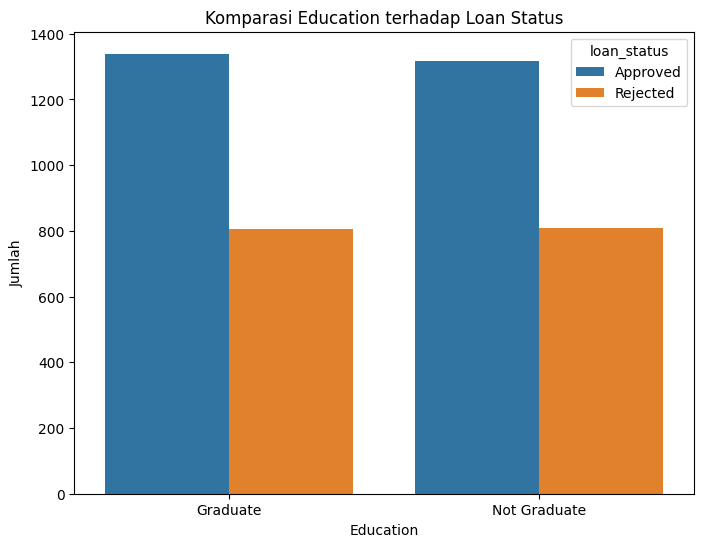

In [34]:
''' Visualisasi data education dengan loan_status'''
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='education', hue='loan_status')
plt.title('Komparasi Education terhadap Loan Status')
plt.xlabel('Education')
plt.ylabel('Jumlah')
plt.show()

### What's the relationship between 'loan_amount' and 'loans_term'? Is the amount of the loan correlated with the duration of the credit?

In [35]:
''' Pengujian dilakukan dengan metode pearson karena data dinilai normal'''
corr_rho, pval_s = stats.pearsonr(df['loan_amount'], df['loan_term'])

print(f"rho-correlation: {corr_rho:.2f}")
print(f"p-value: {pval_s}")

rho-correlation: 0.01
p-value: 0.5815525269835901


H0 = There is a relationship between loan_amount and loan_term

H1 = There is no relationship between loan_amount and loan_term

The r-corr value shows that there is a positive but very weak correlation. P value has exceeded 0.05 then H0 fails to be rejected so loan_amount and loan_term have no relationship.

/Users/harari/miniconda3/envs/hck7/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


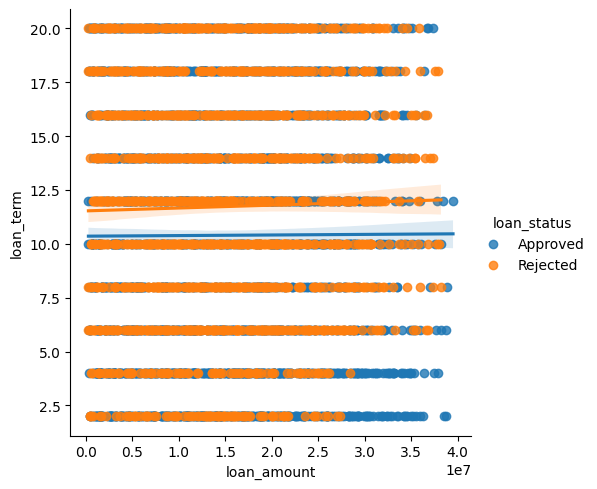

In [36]:
'''Visusalisasi data loan_amount dengan loan_term'''
sns.lmplot(data=df,x='loan_amount', y='loan_term',hue='loan_status')

### Is there a correlation between 'no_of_dependents' and 'loan_amount'? Does the amount of family dependence affect the loan amount approved?

In [37]:
''' Pengujian korelasi dilakukan dengan metode pearson karena data diasumsikan sebagai data normal'''
corr_rho, pval_s = stats.pearsonr(df['loan_amount'], df['no_of_dependents'])

print(f"r-correlation: {corr_rho:.2f}")
print(f"p-value: {pval_s}")

r-correlation: -0.00
p-value: 0.8259881737185879


H0 = There is no relationship between loan_amount and no_of_dependent

H1 = There is a relationship between loan_amount and no_of_dependent

With an r-corr value of 0, it indicates that there is no correlation between the number of dependents and the amount of the loan. And also the p-value is > 0.05, so H0 fails to be rejected. So there is no correlation between the number of dependents and the loan amount.

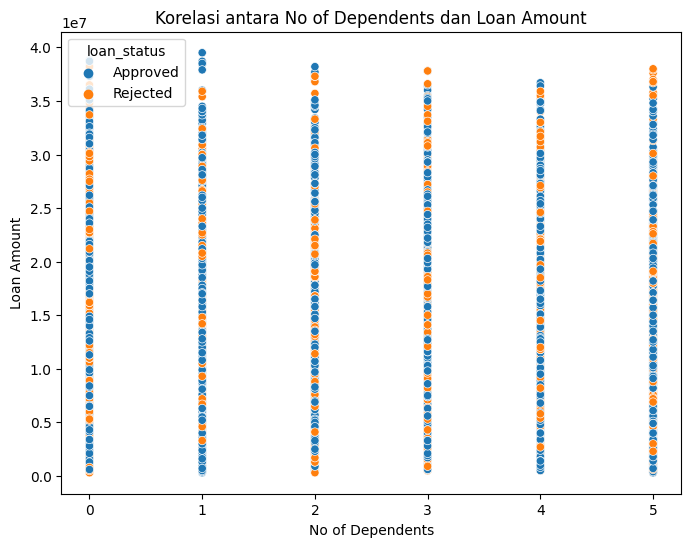

In [38]:
''' Visusalisasi data no_of_dependents dengan loan_amount'''
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='no_of_dependents', y='loan_amount', hue='loan_status')
plt.title('Korelasi antara No of Dependents dan Loan Amount')
plt.xlabel('No of Dependents')
plt.ylabel('Loan Amount')
plt.show()

### How's the correlation between the assets owned and the amount borrowed?

In [56]:
''' Pengujian korelasi dilakukan dengan metode pearson karena data diasumsikan normal. Pengujian dilakukan secara looping '''
asset = ['residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

for i in asset:
    corr_r, pval_s = stats.pearsonr(df['loan_amount'], df[i])

    print(f"r-correlation loan_amount and {i} is {corr_r:.2f}")
    print(f"p-value loan_amount and {i} is {pval_s}")
    print()

r-correlation loan_amount and residential_assets_value is 0.59
p-value loan_amount and residential_assets_value is 0.0

r-correlation loan_amount and commercial_assets_value is 0.60
p-value loan_amount and commercial_assets_value is 0.0

r-correlation loan_amount and luxury_assets_value is 0.86
p-value loan_amount and luxury_assets_value is 0.0

r-correlation loan_amount and bank_asset_value is 0.79
p-value loan_amount and bank_asset_value is 0.0



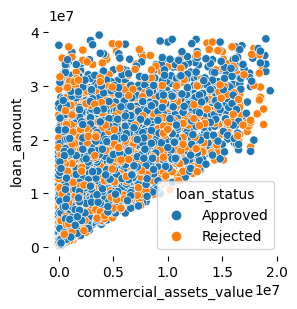

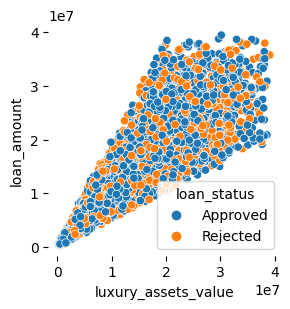

In [40]:
''' Visualisasi data antara aset-aset dengan loan_amount secara looping'''
asset = [ 'residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value', ]
for i in asset :
    f, ax = plt.subplots(figsize=(3, 3))
    sns.despine(f, left=True, bottom=True)
    sns.scatterplot(x=i, y='loan_amount',
                    hue=df['loan_status'], 
                    data=df, ax=ax)

H0: There is no relationship between assets and loan amount

H1: There is a relationship between assets and loan amount

Because the r-chor shows a positive correlation and the p-value has a value <0.05, it is successful in rejecting H0. So, there is a relationship between assets and loan_amount.

### How's the correlation between the cibil scores and the assets the borrower owns?
 

r-correlation cibil_score and residential_assets_value is -0.02
p-value cibil_score and residential_assets_value is 0.1925676270084589

r-correlation cibil_score and commercial_assets_value is -0.00
p-value cibil_score and commercial_assets_value is 0.805520692842837

r-correlation cibil_score and luxury_assets_value is -0.03
p-value cibil_score and luxury_assets_value is 0.06153354602179831

r-correlation cibil_score and bank_asset_value is -0.02
p-value cibil_score and bank_asset_value is 0.31197944849285836



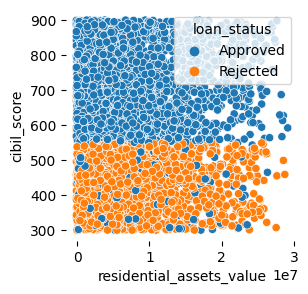

In [57]:
''' Pengujian korelasi dilakukan dengan metode pearson karena data diasumsikan normal. Pengujian dilakukan secara looping '''
asset = ['residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

for i in asset:
    corr_r, pval_s = stats.pearsonr(df['cibil_score'], df[i])

    print(f"r-correlation cibil_score and {i} is {corr_r:.2f}")
    print(f"p-value cibil_score and {i} is {pval_s}")
    print()

   
# Visualisasi data asset dengan cibil_score secara looping
asset = [ 'residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value', ]
for i in asset :
    f, ax = plt.subplots(figsize=(3, 3))
    sns.despine(f, left=True, bottom=True)
    sns.scatterplot(x=i, y='cibil_score',
                    hue=df['loan_status'], 
                    data=df, ax=ax)


H0: There is no relationship between assets and cibil score

H1: There is a relationship between assets and civil society score

Because the r-chor shows a very weak negative correlation and the p-value has a value of >0.05, it fails to reject H0. So, there is no relationship between assets and loan_amount.

# Conclusion 

- Based on this data, the probability of a lender getting bank approval is 62%.


- Categorical class division, such as education level and type of job, does not affect approval.




- The value of an asset owned by a borrower, such as residential assets, commercial assets,luxury_assets_value and bank_asset_value are not affected by the loan approval.



- The value of the entire asset belonging to the client is positively correlated with the loan amount. By the way, big assets have a huge number of loans as well.



- The size of the loan amount and the maturity do not affect the approval of the bank.



- The only factor in a bank's approval is the credit score.



- Banks are advised to give approval to borrowers who have high scores because they are more secured.




### Proof of Conclusion 

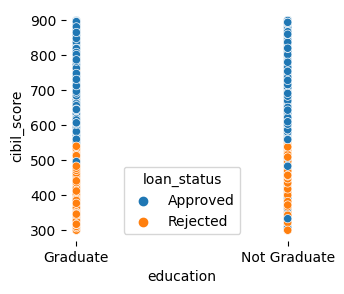

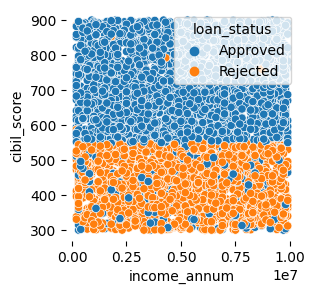

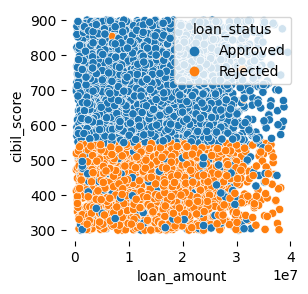

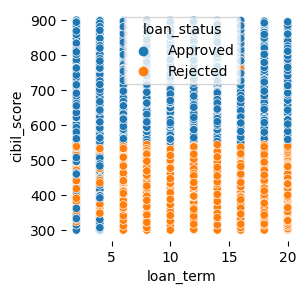

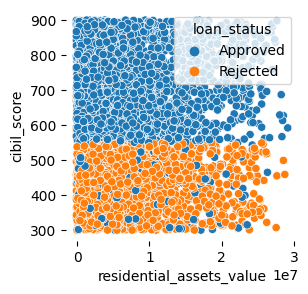

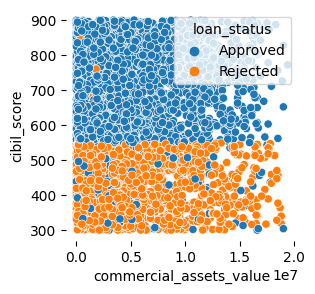

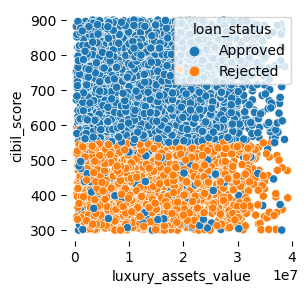

In [ ]:
''' Visualisasi data cibil_score terhadap seluruh aspek data'''
cek_cibil = [ 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value' ]

for i in cek_cibil :
    f, ax = plt.subplots(figsize=(3, 3))
    sns.despine(f, left=True, bottom=True)
    sns.scatterplot(x=i, y='cibil_score',
                    hue=df['loan_status'], 
                    data=df, ax=ax)

From the dissemination of such data from each aspect found that more customers with high scores (cibil score) that diapprove by banks.